# BUILDING A CLASSIFICATION MODEL TO CATEGORIZE AND PREDICT HOSPITAL TEST RESULTS

PROBLEM STATEMENT

Patients often get discharged without fully understanding the severity of their conditions, which can often be explained by their test results.

The dataset contains the following columns:
    - Name
    - Age
    - Blood Type
    - Medical Condition
    - Date of Admission
    - Doctor
    - Hospital
    - Insurance Provider
    - Billing Amount
    - Room Number
    - Admission Type
    - Discharge Date
    - Medication
    - Test Results (An indicator of the normalcy of the patient's test result)
                    
This is a multi-classification problem.

# IMPORTING PYTHON MODULES

In [1]:
#Importing the required libraries
import numpy as np #for linear algebra/data preprocessing
import pandas as pd #for data preprocessing
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #for visualization

import datetime

from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split, KFold,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, balanced_accuracy_score, accuracy_score, classification_report, precision_score, f1_score, roc_auc_score, r2_score, recall_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pickle

# READING THE DATA

In [2]:
#Reading the data as a  .csv file and checking the first 20 observations
health = pd.read_csv("health.csv")
health.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
#Checking the shape of the data
health.shape

(55500, 15)

In [4]:
#Checking the info of the data
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
#Chcking the columns of the data
health.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [6]:
#Checking the number of frequency of unique values in the "Blood Type" column
health['Blood Type'].value_counts()

A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: Blood Type, dtype: int64

In [7]:
#Checking the number of frequency of unique values in the "Medical Condition" column
health['Medical Condition'].value_counts()

Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: Medical Condition, dtype: int64

In [8]:
#Checking the number of frequency of unique values in the "Admission Type" column
health['Admission Type'].value_counts()

Elective     18655
Urgent       18576
Emergency    18269
Name: Admission Type, dtype: int64

In [9]:
#Checking the number of frequency of unique values in the "Medication" column
health['Medication'].value_counts()

Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: Medication, dtype: int64

In [10]:
#Checking the number of frequency of unique values in the "Test Resukts" column
health['Test Results'].value_counts()

Abnormal        18627
Normal          18517
Inconclusive    18356
Name: Test Results, dtype: int64

In [11]:
#Checking the minimum value in the "Billing Amount" column
np.min(health['Billing Amount'])

-2008.4921398591305

In [12]:
#Checking the maximum value in the "Billing Amount" column
np.max(health['Billing Amount'])

52764.276736469175

In [13]:
#Dropping irrelevant columns
health.drop(['Name', 'Doctor', 'Hospital', 'Insurance Provider', 'Room Number'], axis= "columns", inplace= True)

In [14]:
#Checking the details of the data
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                55500 non-null  int64  
 1   Gender             55500 non-null  object 
 2   Blood Type         55500 non-null  object 
 3   Medical Condition  55500 non-null  object 
 4   Date of Admission  55500 non-null  object 
 5   Billing Amount     55500 non-null  float64
 6   Admission Type     55500 non-null  object 
 7   Discharge Date     55500 non-null  object 
 8   Medication         55500 non-null  object 
 9   Test Results       55500 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.2+ MB


# FEATURE ENGINEERING

In [15]:
#Creating a function that calculates the number of days spent in the hospital based on the difference between two different dates

def calculate_days(date_str1, date_str2, format_code="%Y-%m-%d"):
  """
  Calculates the difference between two date strings.

  Args:
      date_str1 (str): The first date string.
      date_str2 (str): The second date string.
      format_code (str, optional): The format code to be used for parsing the date strings.
          Defaults to "%Y-%m-%d" (YYYY-MM-DD).

  Returns:
      datetime.timedelta: The difference between the two dates, 
                          or None if there's an error during conversion.

  Prints informative messages about conversion errors.
  """

  try:
    # Converting strings to datetime objects
    date1 = datetime.datetime.strptime(date_str1, format_code)
    date2 = datetime.datetime.strptime(date_str2, format_code)

    # Calculating the difference
    duration = date2 - date1
    days = duration.days
    return days
  except ValueError as e:
    print(f"Error: Invalid date format(s). {e}")
    return None

In [16]:
# Applying the function using vectorized approach, using "Date of Admission" and "Discharge Date" columns
health['Days Hospitalized'] = health[['Date of Admission', 'Discharge Date']].apply(lambda x: calculate_days(x[0], x[1]), axis=1)



In [17]:
#Checking the columns in the data again
health.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Billing Amount', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results', 'Days Hospitalized'],
      dtype='object')

In [18]:
#Viewing the first 5 rows of the data
health.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Days Hospitalized
0,30,Male,B-,Cancer,2024-01-31,18856.281306,Urgent,2024-02-02,Paracetamol,Normal,2
1,62,Male,A+,Obesity,2019-08-20,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,76,Female,A-,Obesity,2022-09-22,27955.096079,Emergency,2022-10-07,Aspirin,Normal,15
3,28,Female,O+,Diabetes,2020-11-18,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,43,Female,AB+,Cancer,2022-09-19,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal,20


In [19]:
#Dropping redundant columns
health.drop(['Date of Admission', 'Discharge Date'], axis= "columns", inplace= True)

In [20]:
#Checking the remaining columns in the data
health.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Billing Amount',
       'Admission Type', 'Medication', 'Test Results', 'Days Hospitalized'],
      dtype='object')

In [21]:
#Viewing the first 5 rows of the data
health.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results,Days Hospitalized
0,30,Male,B-,Cancer,18856.281306,Urgent,Paracetamol,Normal,2
1,62,Male,A+,Obesity,33643.327287,Emergency,Ibuprofen,Inconclusive,6
2,76,Female,A-,Obesity,27955.096079,Emergency,Aspirin,Normal,15
3,28,Female,O+,Diabetes,37909.782410,Elective,Ibuprofen,Abnormal,30
4,43,Female,AB+,Cancer,14238.317814,Urgent,Penicillin,Abnormal,20


# EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Gender', ylabel='count'>

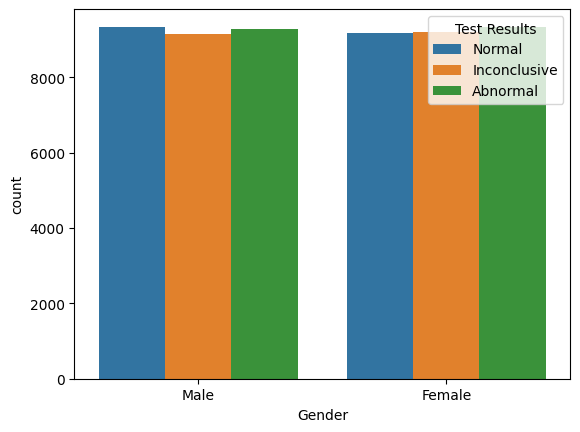

In [22]:
sns.countplot(x = 'Gender', hue = 'Test Results', data = health)

<AxesSubplot:xlabel='Medication', ylabel='count'>

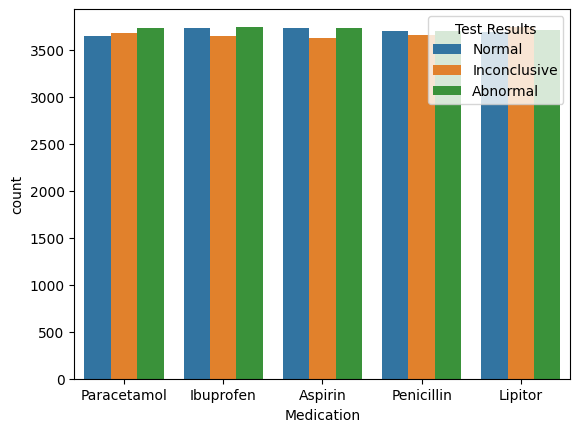

In [24]:
sns.countplot(x = 'Medication', hue = 'Test Results', data = health)

<AxesSubplot:xlabel='Test Results', ylabel='Age'>

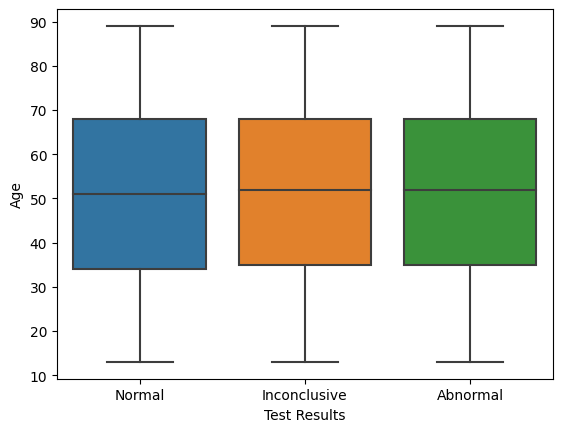

In [23]:
sns.boxplot(x = 'Test Results', y = 'Age', data = health)

# DATA PREPROCESSING

In [25]:
#Instantiating encoders

lb = LabelBinarizer()
le = LabelEncoder()

In [26]:
#Transforming the "Gender" column
health['Gender']= lb.fit_transform(health['Gender'])

In [27]:
#Viewing the first 5 rows of data
health.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results,Days Hospitalized
0,30,1,B-,Cancer,18856.281306,Urgent,Paracetamol,Normal,2
1,62,1,A+,Obesity,33643.327287,Emergency,Ibuprofen,Inconclusive,6
2,76,0,A-,Obesity,27955.096079,Emergency,Aspirin,Normal,15
3,28,0,O+,Diabetes,37909.782410,Elective,Ibuprofen,Abnormal,30
4,43,0,AB+,Cancer,14238.317814,Urgent,Penicillin,Abnormal,20


In [28]:
#Transforming the reamining categorical columns

health['Blood Type'] = le.fit_transform(health['Blood Type'])
health['Medical Condition'] = le.fit_transform(health['Medical Condition'])
health['Admission Type'] = le.fit_transform(health['Admission Type'])
health['Medication'] = le.fit_transform(health['Medication'])
health['Test Results'] = le.fit_transform(health['Test Results'])

In [29]:
#Viewing the first 5 rows of data
health.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results,Days Hospitalized
0,30,1,5,2,18856.281306,2,3,2,2
1,62,1,0,5,33643.327287,1,1,1,6
2,76,0,1,5,27955.096079,1,0,2,15
3,28,0,6,3,37909.782410,0,1,0,30
4,43,0,2,2,14238.317814,2,4,0,20


# MODEL BUILDING

In [30]:
#Splitting the dataset
X = health.drop('Test Results', axis = 1)
y = health['Test Results']

In [31]:
#Viewing the first 5 rows of the train data
X.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Days Hospitalized
0,30,1,5,2,18856.281306,2,3,2
1,62,1,0,5,33643.327287,1,1,6
2,76,0,1,5,27955.096079,1,0,15
3,28,0,6,3,37909.782410,0,1,30
4,43,0,2,2,14238.317814,2,4,20


In [32]:
#Viewing the first  5 rows of the test data
y.head()

0    2
1    1
2    2
3    0
4    0
Name: Test Results, dtype: int32

In [33]:
#Splitting the data further
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

RANDOM FOREST CLASSIFIER

In [34]:
#Instantiating and fitting the Random Forest cLassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
#Predicting with the Random Forest classification model
rf_mod_pred = rf_model.predict(X_test)

In [36]:
#Checking the accuracy of the model
accuracy_score(y_test, rf_mod_pred)

0.4399099099099099

In [56]:
#Creating a function that checks and plots the Confusion Matrix

def ConfusionMatrix(ytest, ypred, labels=None):
    """
    Generates a beautiful confusion matrix for a classification model's performance.

    Args:
        ytest (array-like): Ground truth (correct) labels for the test set.
        ypred (array-like): Predicted labels by the model for the test set.
        labels (list, optional): Custom labels for the confusion matrix ticks and heatmap.
            Defaults to None, which infers labels from ytest's unique values.

    Returns:
        None (displays the confusion matrix plot using matplotlib and seaborn).
    """

    # Ensuring correct dimensions for ytest and ypred
    if len(ytest.shape) != 1 or len(ypred.shape) != 1:
        raise ValueError("ytest and ypred must be 1-dimensional arrays.")

    # Extracting unique target labels
    if labels is None:
        labels = list(set(ytest))

    if len(labels) != 3:
        print(f"Warning: The provided labels list ({len(labels)}) does not match the expected number of unique values (3).")

    # Creationg confusion matrix
    cm = confusion_matrix(ytest, ypred)

    # Creating confusion matrix plot using seaborn
    plt.figure(figsize=(7, 5))
    ax = sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='winter')

    # Setting tick labels and adjust layout for 3 unique values
    plt.xlabel('Predicted Label', fontsize=13)
    plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
    plt.ylabel('True Label', fontsize=13)
    plt.title('Confusion Matrix', fontsize=14)

    # Adjusting spacing and layout to accommodate more labels (if necessary)
    plt.tight_layout()

    plt.show()


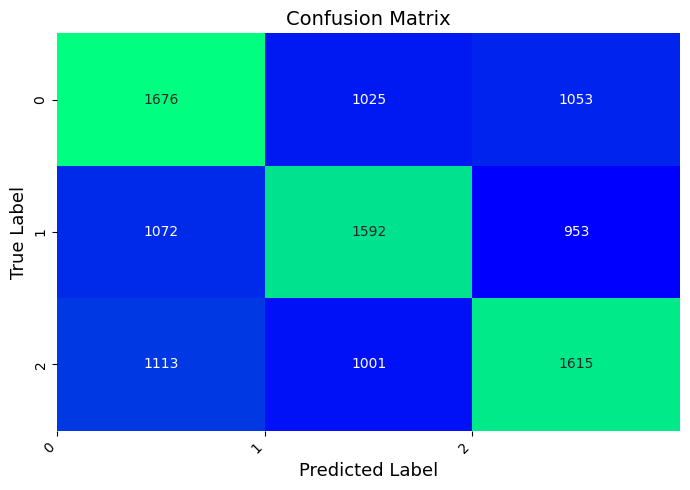

In [57]:
#Checking the confusion matrix
ConfusionMatrix(y_test, rf_mod_pred)

eXTREME GRADIENT BOOSTING CLASSIFIER

In [39]:
#Instantiating and fitting the Xtreme Gradient Boost cLassifier
xgb_model = XGBClassifier(use_label_encoder=False)
xgb_model = xgb_model.fit(X_train, y_train)

In [40]:
#Predicting with the model
xgb_mod_pred = xgb_model.predict(X_test)

In [41]:
#Checking the accuracy of the model
accuracy_score(y_test, xgb_mod_pred)

0.36099099099099097

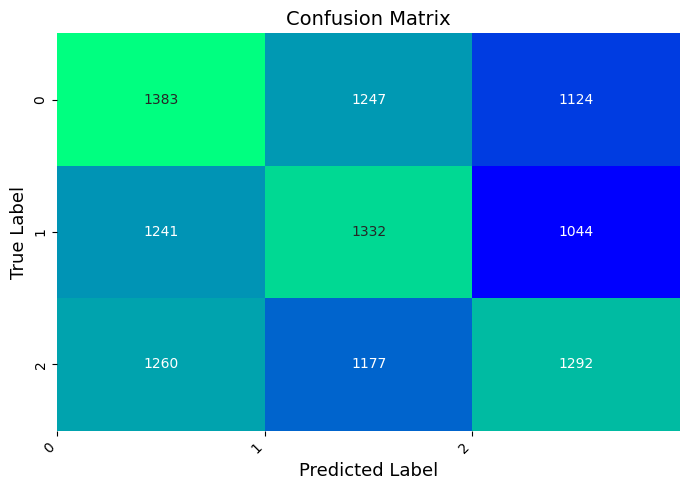

In [58]:
#Checking the confusion matrix
ConfusionMatrix(y_test, xgb_mod_pred)

SUPPORT VECTOR CLASSIFIER

In [42]:
#Instantiating and fitting the Support Vector Classifier
SVM_mod = SVC()
SVM_mod.fit(X_train, y_train)

SVC()

In [43]:
#Predicting with the model
SVM_mod_pred = SVM_mod.predict(X_test)

In [44]:
#Checking the accuracy of the model
accuracy_score(y_test, SVM_mod_pred)

0.33306306306306305

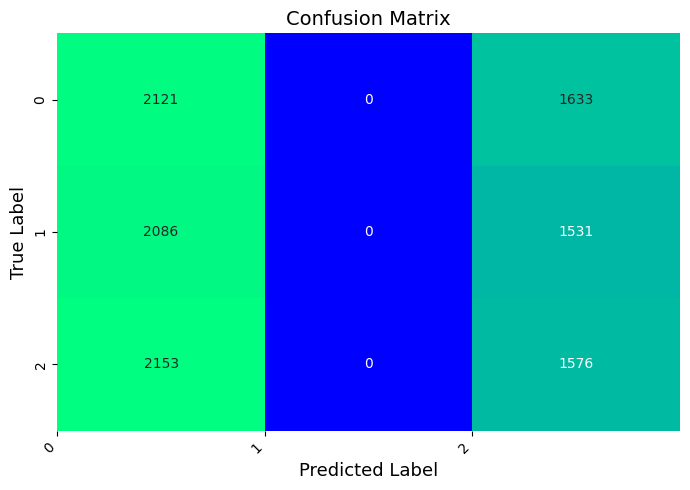

In [59]:
#Checking the confusion matrix
ConfusionMatrix(y_test, SVM_mod_pred)

K-NEAREST NEIGHBOR CLASSIFIER

In [45]:
#Instantiating and fitting the k-Nearest Neighbors cLassifier
knn_mod = KNeighborsClassifier(n_neighbors = 6)
knn_mod.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [46]:
#Predicting with the model
knn_mod_pred = knn_mod.predict(X_test)

In [47]:
#Checking the accuracy of the model
accuracy_score(y_test, knn_mod_pred)

0.36576576576576575

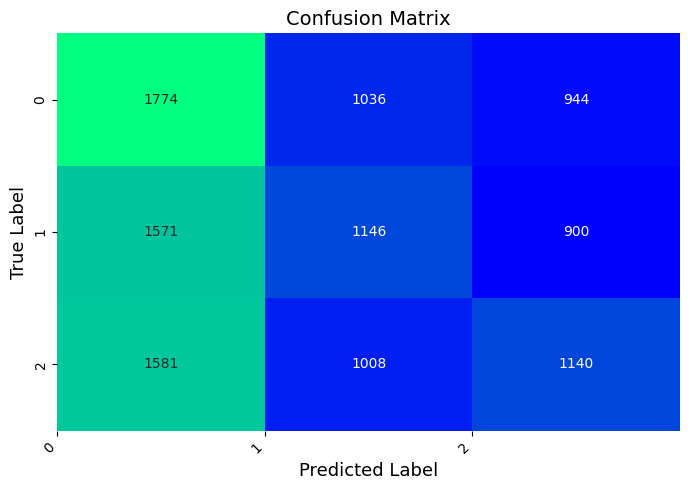

In [60]:
#Checking the confusion matrix
ConfusionMatrix(y_test, knn_mod_pred)

DECISION TREE CLASSIFIER

In [48]:
#Instantiating and fitting the Decision Tree cLassifier
dtc_mod = DecisionTreeClassifier()
dtc_mod.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
#Predicting and checking the accuracy of the model
dtc_mod_pred = dtc_mod.predict(X_test)
accuracy_score(y_test, dtc_mod_pred)

0.4058558558558559

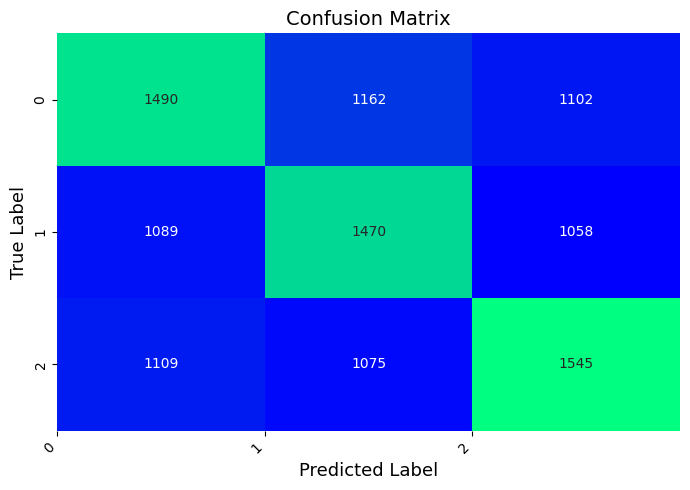

In [61]:
#Checking the confusion matrix
ConfusionMatrix(y_test, dtc_mod_pred)

GRADIENT BOOSTING CLASSIFIER

In [50]:
#Instantiating and fitting the Gradient Boosting cLassifier
gb_mod = GradientBoostingClassifier()
gb_mod.fit(X_train, y_train)

GradientBoostingClassifier()

In [51]:
#Predicting and checking the accuracy of the model
gb_mod_pred = gb_mod.predict(X_test)
accuracy_score(y_test, gb_mod_pred)

0.34540540540540543

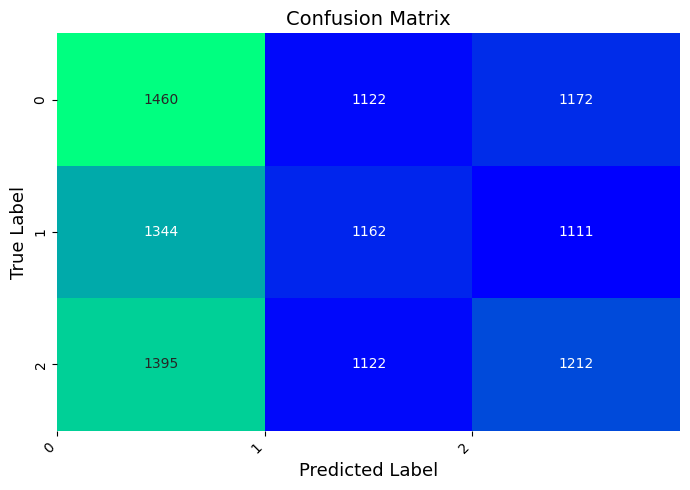

In [62]:
#Checking the confusion matrix
ConfusionMatrix(y_test, gb_mod_pred)

GAUSSIAN NB CLASSIFIER

In [52]:
#Instantiating and fitting the Gaussian NB cLassifier
nb_mod = GaussianNB()
nb_mod.fit(X_train, y_train)

GaussianNB()

In [53]:
#Predicting and checking the accuracy of the model
nb_mod_pred = nb_mod.predict(X_test)
accuracy_score(y_test, nb_mod_pred)

0.33585585585585587

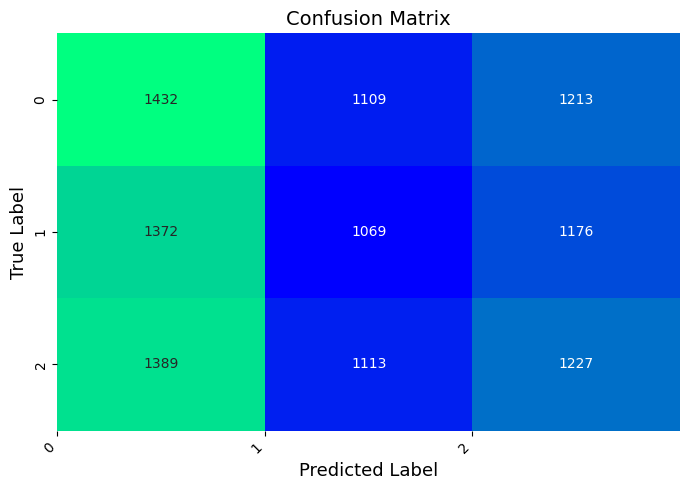

In [64]:
#Checking the confusion matrix
ConfusionMatrix(y_test, nb_mod_pred)

LOGISTIC REGRESSION

In [54]:
#Instantiating and fitting the Logistic Regression cLassifier
lr_mod = LogisticRegression()
lr_mod.fit(X_train, y_train)

LogisticRegression()

In [55]:
#Predicting and checking the accuracy of the model
lr_mod_pred = lr_mod.predict(X_test)
accuracy_score(y_test, lr_mod_pred)

0.3381081081081081

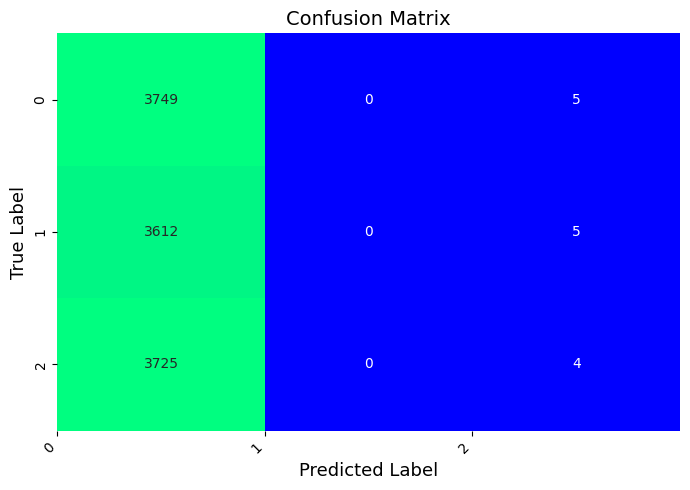

In [65]:
#Checking the confusion matrix
ConfusionMatrix(y_test, lr_mod_pred)

# SAVING THE MODEL

In [66]:
#Specifying a filename for the model
filename = 'final_health_model.sav'

# Saving the model to disk
pickle.dump(rf_model, open(filename, 'wb'))